In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import pandas as pd
import copy
import math
%matplotlib inline



In [2]:
data = pd.read_csv('data/hour.csv')
print(data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [3]:
y = data['cnt'].values
print(y[:10])

[16 40 32 13  1  1  2  3  8 14]


In [4]:
categorical_features = ['season', 'hr', 'weekday', 'mnth', 'weathersit','yr']
X_categorical = pd.get_dummies(data[categorical_features], columns=categorical_features, drop_first =False)

In [5]:
print(X_categorical[:10])

   season_1  season_2  season_3  season_4   hr_0   hr_1   hr_2   hr_3   hr_4  \
0      True     False     False     False   True  False  False  False  False   
1      True     False     False     False  False   True  False  False  False   
2      True     False     False     False  False  False   True  False  False   
3      True     False     False     False  False  False  False   True  False   
4      True     False     False     False  False  False  False  False   True   
5      True     False     False     False  False  False  False  False  False   
6      True     False     False     False  False  False  False  False  False   
7      True     False     False     False  False  False  False  False  False   
8      True     False     False     False  False  False  False  False  False   
9      True     False     False     False  False  False  False  False  False   

    hr_5  ...  mnth_9  mnth_10  mnth_11  mnth_12  weathersit_1  weathersit_2  \
0  False  ...   False    False    False

In [6]:
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'holiday', 'workingday']
X_numerical_normalized = data[numerical_features]
#combine final x value
x = pd.concat([X_numerical_normalized, X_categorical], axis=1).values


In [7]:
#total number of sampples
m = x.shape[0]

#60/20/20 split
train_end = int(m*0.6) #training set end
val_end = int(m*0.8) #validation set end

#splitting our data
X_train = x[:train_end]
Y_train = y[:train_end]

#60-80%
X_val = x[train_end:val_end]
Y_val = y[train_end:val_end]

#final 20%
X_test = x[val_end:]
Y_test = y[val_end:]

print(f"Total samples: {m}")
print(f"X_train shape: {X_train.shape}")
print(f"fwb: {Y_train.shape}")
print(f"X_val shape:   {X_val.shape}")
print(f"X_test shape:  {X_test.shape}")

Total samples: 17379
X_train shape: (10427, 59)
fwb: (10427,)
X_val shape:   (3476, 59)
X_test shape:  (3476, 59)


In [8]:
def compute_cost(X, Y, w, b):
    m = X.shape[0]

    f_wb = np.dot(X, w) + b

    cost = (f_wb -Y) ** 2

    total_cost = (1/ (2*m)) * np.sum(cost)

    return total_cost

In [9]:
def compute_gradient(X,Y,w,b):
    m, n = X.shape
    f_wb = np.dot(X, w) + b

    err = f_wb - Y

    dj_wb = (1/m) * np.dot(X.T, err)
    dj_db =(1/m) * np.sum(err)

    return dj_wb, dj_db

In [10]:
n = X_train.shape[1]

initial_w = np.zeros(n)
initial_b = 0.0

iterations = 5000
alpha = 0.01

In [11]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    #code from lab 1
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Y_train: (10427,)
Iteration    0: Cost 18676.91   
Iteration  500: Cost  6152.64   
Iteration 1000: Cost  4834.71   
Iteration 1500: Cost  4093.54   
Iteration 2000: Cost  3652.88   
Iteration 2500: Cost  3382.91   
Iteration 3000: Cost  3214.31   
Iteration 3500: Cost  3107.44   
Iteration 4000: Cost  3038.79   
Iteration 4500: Cost  2994.10   


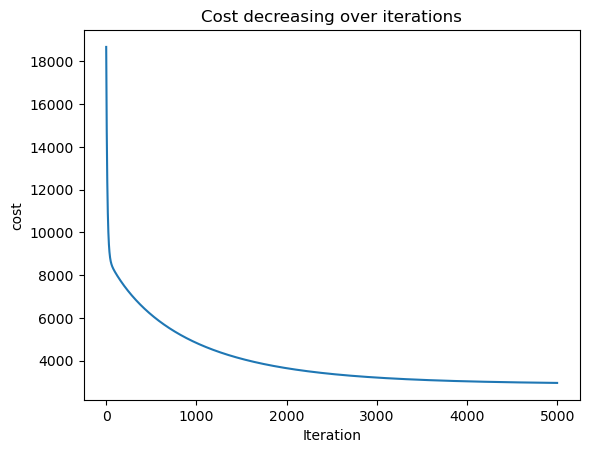

model validation RMSE: 144.68651285018157


In [12]:
print(f"Y_train: {Y_train.shape}")
w, b, J_history, _ = gradient_descent(X_train, Y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)


plt.plot(J_history)
plt.title("Cost decreasing over iterations")
plt.xlabel("Iteration")
plt.ylabel("cost")
plt.show()

Y_pred = np.dot(X_val, w) + b
rmse = np.sqrt(np.mean((Y_pred - Y_val)**2))
print(f"model validation RMSE: {rmse}")

In [15]:
print(f"Average rentals: {Y_train.mean()}")
print(f"Max rentals: {Y_train.max()}")


Average rentals: 144.79687350148652
Max rentals: 782


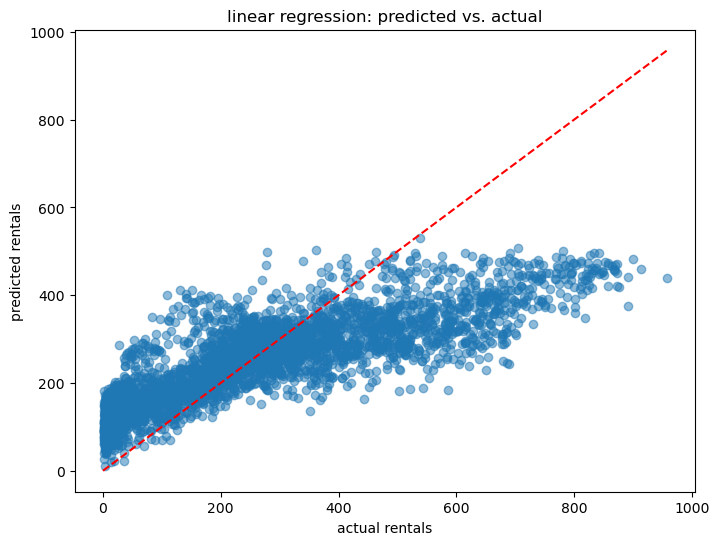

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(Y_val, Y_pred, alpha=0.5)
plt.plot([0,max(Y_val)], [0,max(Y_val)], color='red', linestyle='--')
plt.xlabel("actual rentals")
plt.ylabel("predicted rentals")
plt.title("linear regression: predicted vs. actual")
plt.show()